# Basic Examples On ML

In this notebook we show you some code snippets. These examples are not by any means exaustive, they are only some commons code templates for Machine Learning tasks.

Almost all ML algorithms presented here are implemented by SciKitLearn library.





`Author: Flávio Clésio (flavio.clésio@movile.com)`


## Basic Input/Output and Data Manipulation

The most used library to manipulate data in Python is Pandas. We use Pandas to read the data and to do some basic filter/data transformation. Along with Pandas, we use Numpy, a package for scientific computation focused in matrices, and we use MatPlot (with the seaborn wrapper) lib to plot some useful graphs and give us some insights about the data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data visualization
from sklearn.model_selection import train_test_split
from sklearn import linear_model

%matplotlib inline

In [2]:
# Path where the files are stored
PATH = '/Volumes/PANZER/Github/ml-lab/ICPC-UNICAMP-2018/Notebooks/' #TODO: Change it to your path

In [3]:
# Now we'll load the data (train and test data) using the read_csv() method of Pandas (pd) and parsing the dates to timestamp
train = pd.read_csv(PATH + "train.csv", parse_dates = ['timestamp'])
test = pd.read_csv(PATH + "test.csv", parse_dates=['timestamp'])

In [4]:
# As we need to transform all our data for feature engineering, 
# let's join our data to perform the same transformations for all

num_train = len(train)
num_test = len(test)
print '# Samples in Train Dataframe:', num_train
print '# Samples in Test Dataframe:', num_test

# Samples in Train Dataframe: 30471
# Samples in Test Dataframe: 7662


In [5]:
# Now we'll store the information about the Y (the variable that we need to predict) and the id's to check
# if our prediction are correct

# Store the dependent variable to a object called y_price_doc_log_train and transform to log
Y = train['price_doc'].values

# Store the id of test dataframe
id_test = test['id']

# Remove the ids (no predictive power) in both datasets and the price_doc variable from X dataset
train.drop(['id','price_doc' ], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

In [6]:
# We bind our dataframes in a single dataframe
df_all = pd.concat([train, test])

num_df_all = len(df_all)

print '# Samples in Test Dataframe:', num_df_all

print 'Shape of our dataset (#Records, #Columns)', (df_all.shape)

# Samples in Test Dataframe: 38133
Shape of our dataset (#Records, #Columns) (38133, 290)


In [7]:
# To see the columns of our dataset lets use the function below
list(df_all)

['timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekd

In [8]:
# Now, let's take a look over the dataset 
df_all.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,40,9,4,0,13,22,1,0,52,4
1,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,36,15,3,0,15,29,1,10,66,14
2,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,25,10,3,0,11,27,0,4,67,10
3,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,11,2,1,4,4,0,0,26,3
4,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,552,319,108,17,135,236,2,91,195,14


In [9]:
# To see some descriptive statistics lets use the function describe()
df_all.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
count,38133.000000,30574.000000,37966.000000,28561.000000,28561.000000,2.347900e+04,28561.000000,28561.000000,23880.000000,3.813300e+04,...,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000,38133.000000
mean,54.111172,34.033460,7.667123,12.567592,1.834390,2.716785e+03,1.900844,6.543995,2.071650,1.766282e+07,...,64.687934,32.805680,11.058820,1.819133,15.387853,30.825741,0.436394,8.847901,53.487635,6.056119
std,35.171162,47.581529,5.276156,6.730496,1.490923,1.308521e+05,0.847620,27.571630,0.864795,2.095034e+07,...,125.214092,74.104439,28.636604,5.469808,29.452128,47.850168,0.609313,20.772155,46.584733,4.904623
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.900000,20.000000,3.000000,9.000000,1.000000,1.966000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,6.000000,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000
50%,50.000000,30.000000,7.000000,12.000000,1.000000,1.980000e+03,2.000000,6.000000,2.000000,1.020722e+07,...,25.000000,9.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.006000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,51.000000,22.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,11.000000
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,643.000000,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000


## Plots

We show you two basic plot. Plot the data is a very important step in Machine learning, you can get some really useful insights about the data.

You can find a much more graphs examples here: 
https://seaborn.pydata.org/examples/index.html

References: 
- https://matplotlib.org/gallery/index.html

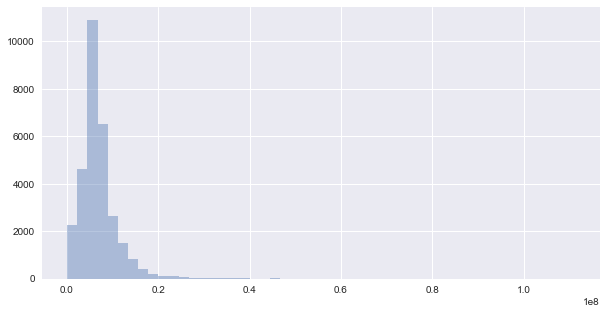

In [10]:
# For plotting we'll use the library called Seaborn 
plt.figure(figsize=(10, 5)) # The size of the plot
sns.distplot(Y, kde = False) # We'll use distribution plot and as first arg we use the column .price_doc

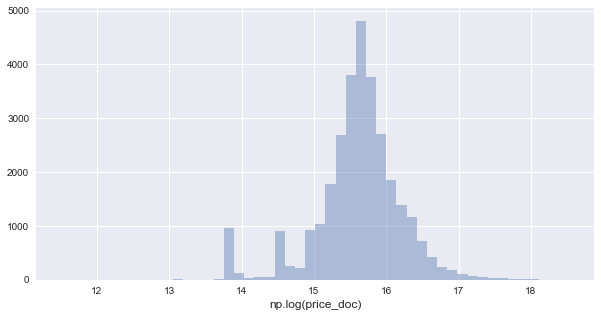

In [11]:
# As we can see there's a lot of outliers and to smooth this records, let's use np.log() function and see the distribution
plt.figure(figsize=(10, 5)) # The size of the plot
sns.distplot(np.log(Y), kde = False) # We'll use distribution plot and as first arg we use the column .price_doc
plt.xlabel('np.log(price_doc)', fontsize=12)

In [12]:
# One thing can help the convergence of ML algorithms it's to remove outliers or smooth or data, to do that
# Let's convert out Y dataset in .log

Y = np.log(Y)

## Data Manipulation

As explained in the comments bellow, we need be carefull about NaN values. Also, for some problems, it is a good ideia combine some features to create new ones. Therefore, you should know do some basic data manipulations.Here are some examples:

In [13]:
# To put another variable inside the dataset. This variable will call price_sq
df_all["kitch_proportions"] = df_all["kitch_sq"]/df_all["full_sq"]

In [14]:
# When we deal with machine learning algorithms, Null values (or NaN) are trouble. You can choose 
# 1) remove then from dataset, 2) replace their values.
# It's much better make replacemens of this values using the mean, or median or some spare value (e.g. -99999) to avoid
# lost some predictive power. Let's check the columns with null.

for col in df_all.columns.values: # For each col the loop will take the value
    if len(df_all[df_all[col].isnull()][col]) > 0: # If the value are null, count each unit of the column
        print("{0}: {1}".format(col, len(df_all[df_all[col].isnull()][col]))) # and print the name of the column and the number of null values

life_sq: 7559
floor: 167
max_floor: 9572
material: 9572
build_year: 14654
num_room: 9572
kitch_sq: 9572
state: 14253
product_type: 33
preschool_quota: 8284
school_quota: 8280
hospital_beds_raion: 17859
raion_build_count_with_material_info: 6209
build_count_block: 6209
build_count_wood: 6209
build_count_frame: 6209
build_count_brick: 6209
build_count_monolith: 6209
build_count_panel: 6209
build_count_foam: 6209
build_count_slag: 6209
build_count_mix: 6209
raion_build_count_with_builddate_info: 6209
build_count_before_1920: 6209
build_count_1921-1945: 6209
build_count_1946-1970: 6209
build_count_1971-1995: 6209
build_count_after_1995: 6209
metro_min_walk: 59
metro_km_walk: 59
railroad_station_walk_km: 59
railroad_station_walk_min: 59
ID_railroad_station_walk: 59
cafe_sum_500_min_price_avg: 16440
cafe_sum_500_max_price_avg: 16440
cafe_avg_price_500: 16440
cafe_sum_1000_min_price_avg: 7746
cafe_sum_1000_max_price_avg: 7746
cafe_avg_price_1000: 7746
cafe_sum_1500_min_price_avg: 5020
cafe_su

In [15]:
# To delete some column, just use the del function
del df_all['timestamp']
del df_all['life_sq']
del df_all['floor']
del df_all['max_floor']
del df_all['material']
del df_all['build_year']
del df_all['num_room']
del df_all['kitch_sq']
del df_all['state']
del df_all['preschool_quota']
del df_all['school_quota']
del df_all['hospital_beds_raion']
del df_all['raion_build_count_with_material_info']
del df_all['build_count_block']
del df_all['build_count_wood']
del df_all['build_count_frame']
del df_all['build_count_brick']
del df_all['build_count_monolith']
del df_all['build_count_panel']
del df_all['build_count_foam']
del df_all['build_count_slag']
del df_all['build_count_mix']
del df_all['raion_build_count_with_builddate_info']
del df_all['build_count_before_1920']
del df_all['build_count_1921-1945']
del df_all['build_count_1946-1970']
del df_all['build_count_1971-1995']
del df_all['build_count_after_1995']

In [16]:
# To fill NaN values with a specific number apply the function .fillna
df_all['cafe_sum_500_min_price_avg'].fillna(-99, inplace=True)
df_all['cafe_sum_500_max_price_avg'].fillna(-99, inplace=True)
df_all['cafe_avg_price_500'].fillna(-99, inplace=True)
df_all['cafe_sum_1000_min_price_avg'].fillna(-99, inplace=True)
df_all['cafe_sum_1000_max_price_avg'].fillna(-99, inplace=True)
df_all['metro_min_walk'].fillna(-99, inplace=True)
df_all['metro_km_walk'].fillna(-99, inplace=True)
df_all['railroad_station_walk_km'].fillna(-99, inplace=True)
df_all['railroad_station_walk_min'].fillna(-99, inplace=True)
df_all['ID_railroad_station_walk'].fillna(-99, inplace=True)
df_all['prom_part_5000'].fillna(-99, inplace=True)
df_all['cafe_sum_5000_min_price_avg'].fillna(-99, inplace=True)
df_all['cafe_sum_5000_max_price_avg'].fillna(-99, inplace=True)
df_all['cafe_avg_price_5000'].fillna(-99, inplace=True)
df_all['product_type'].fillna(-99, inplace=True)
df_all['green_part_2000'].fillna(-99, inplace=True)
df_all['kitch_proportions'].fillna(-99, inplace=True)

In [17]:
# To fill the the mean use the .mean()
df_all['cafe_avg_price_1000'].fillna(train['cafe_avg_price_1000'].mean(), inplace=True)
df_all['cafe_sum_1500_min_price_avg'].fillna(train['cafe_sum_1500_min_price_avg'].mean(), inplace=True)
df_all['cafe_sum_1500_max_price_avg'].fillna(train['cafe_sum_1500_max_price_avg'].mean(), inplace=True)
df_all['cafe_avg_price_1500'].fillna(train['cafe_avg_price_1500'].mean(), inplace=True)
df_all['cafe_sum_2000_min_price_avg'].fillna(train['cafe_sum_2000_min_price_avg'].mean(), inplace=True)

In [18]:
# To fill the the median use the .median()
df_all['cafe_sum_2000_max_price_avg'].fillna(train['cafe_sum_2000_max_price_avg'].median(), inplace=True)
df_all['cafe_avg_price_2000'].fillna(train['cafe_avg_price_2000'].median(), inplace=True)
df_all['cafe_sum_3000_min_price_avg'].fillna(train['cafe_sum_3000_min_price_avg'].median(), inplace=True)
df_all['cafe_sum_3000_max_price_avg'].fillna(train['cafe_sum_3000_max_price_avg'].median(), inplace=True)
df_all['cafe_avg_price_3000'].fillna(train['cafe_avg_price_3000'].median(), inplace=True)

In [19]:
# Another big problem for ML Algorithms it's the representation of categorical variables.
# this is because, most of this algoritms deals only with numeric representations. 

# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object']) # Select columns with numerical variables

df_obj = df_all.select_dtypes(include=['object']).copy() # Select columns with non numerical variables

In [20]:
for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

In [21]:
df_obj.head()

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,2
3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,1,1,0,0,0,0,0,1,1


In [22]:
# Now we can join this two data frames using the function concat() 
df_all = pd.concat([df_numeric, df_obj], axis=1)

In [23]:
# Create a validation set
#num_val = int(num_train * 0.2)

In [24]:
# After we cleasing our data in pandas, we need to transform this data in a numpy array
# because the most popular machine learning packages only make the computation using this format
# To to that, let's convert our dataframe 
X_all = df_all.values
X = X_all[:num_train]

In [25]:
# In this step we'll use the train dataset to split in training and test to ensure that our algorithm 
# is learning and to perform some quality check over the rmse

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # We'll use 20% of the data for test

print('X Train shape is', X_train.shape)
print('Y Train shape is', y_train.shape)
print('X Test shape is', X_test.shape)
print('Y Test shape is', y_test.shape)

('X Train shape is', (24376, 263))
('Y Train shape is', (24376,))
('X Test shape is', (6095, 263))
('Y Test shape is', (6095,))


## Linear Regression

Linear Regression models are models which fits the data in linear equations. Linear Regression models are really useful in many cases and it is, almost always, the first choice when dealing with a ML problem.

There are some variants from the basic Linear Regression model. The two most common are Ridge Regression and Lasso Regression. The ideia behind these two models is regularize the model, eliminating useless features.

References: 

- https://en.wikipedia.org/wiki/Tikhonov_regularization
- https://en.wikipedia.org/wiki/Lasso_(statistics)
- https://en.wikipedia.org/wiki/Linear_regression


In [26]:
# Now we'll use the a Linear model to fit this data
# First we use .LinearRegression() function of the linear_model library and make the object lm
lm = linear_model.LinearRegression()

# After this, we make a object called model where we'll call the function .fit where we use as argument 
# X_train and Y_train datasets to perform the fit
model = lm.fit(X_train, y_train)

# In this step we'll make the predictions objects after we call the predict function using a 
# X_test dataframe as parameter 
predictions = lm.predict(X_test)

# And now we perform a inverse transformation of the log using np.exp() function
y_pred = np.exp(predictions)

In [27]:
# To make an assessment of the quality of the model, we'll use the RMSE as a main metric to assess the performance of
# the model
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

rms error is: 6590782.58109


In [28]:
# There's another way to do that
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(y_pred.astype('int64'),y_test)
print("rms error is: " + str(rmse_val))

rms error is: 6590782.58109


In [29]:
# Now let's do some submission
# First we'll get the records of test database and store in some object
test_sub = X_all[:-num_train]
print('Test Sub shape is', test_sub.shape)

('Test Sub shape is', (7662, 263))


In [30]:
# We'll made the prediction using our test dataset and store inside y_pred object
predictions = lm.predict(test_sub)

y_pred = np.exp(predictions)

### Submision

You need to create your submission when you want to test your model using the test data. These next cells creates a file with the submission format.

In [31]:
# We'll join the id and the predictions and store in an object called df_submission
df_submission = pd.DataFrame({'id': id_test, 'price_doc': y_pred.astype('int64')})

In [32]:
# Let's see what we got
df_submission.head(10)

,id,price_doc
0,30474,5483799
1,30475,6441868
2,30476,5433498
3,30477,6981448
4,30478,9728970
5,30479,5539864
6,30480,6462102
7,30481,6528096
8,30482,5750421
9,30483,5229801


In [33]:
# To generate the file, we'll use to_csv function and we'll use the submission.csv ans the name of the file
df_submission.to_csv('submission.csv', index=False)

In [34]:
# Check the submission format
! head -n15 submission.csv

id,price_doc
30474,5483799
30475,6441868
30476,5433498
30477,6981448
30478,9728970
30479,5539864
30480,6462102
30481,6528096
30482,5750421
30483,5229801
30484,4725018
30485,4054000
30486,5464960
30487,4641812


In [35]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
y_pred = np.exp(predictions)

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

rms error is: 6588663.29143


In [36]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)
reg.predict(X_test)

predictions = reg.predict(X_test)
y_pred = np.exp(predictions)

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

rms error is: 6325898.69787


## Decision Tree Model

This type of model creates a decision tree based on the parameters. Each node will have some specific constant for each one of the parameters. It is a very powerful model, combining the versatile of linear models with a more flexible from decision trees.

References:
- http://scikit-learn.org/stable/modules/tree.html#tree
- https://en.wikipedia.org/wiki/Decision_tree_learning#Decision_tree_types

In [37]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

predictions = clf.predict(X_test)
y_pred = np.exp(predictions)

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

rms error is: 8537604.49169


## Gradient Boosting

Gradient boosting is a technique which combines several weak models to predict the result. This kind of approach is named as ensamble. XGBoost is a library which implements the gradient boosting method. XGBoost is being used with very good results for Kaggle problems.


References: 
- https://en.wikipedia.org/wiki/Gradient_boosting
- https://en.wikipedia.org/wiki/Xgboost
- https://github.com/dmlc/xgboost

In [39]:
import xgboost as xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_test, label=y_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 50, watchlist, early_stopping_rounds=100)

predictions = clf.predict(xgb.DMatrix(X_test))

y_pred = np.exp(predictions)

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0]	train-rmse:14.8164	valid-rmse:14.8324
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[1]	train-rmse:14.5206	valid-rmse:14.5366
[2]	train-rmse:14.2306	valid-rmse:14.2466
[3]	train-rmse:13.9464	valid-rmse:13.9625
[4]	train-rmse:13.6679	valid-rmse:13.6841
[5]	train-rmse:13.395	valid-rmse:13.4112
[6]	train-rmse:13.1276	valid-rmse:13.1438
[7]	train-rmse:12.8655	valid-rmse:12.8817
[8]	train-rmse:12.6087	valid-rmse:12.625
[9]	train-rmse:12.357	valid-rmse:12.3733
[10]	train-rmse:12.1103	valid-rmse:12.1266
[11]	train-rmse:11.8686	valid-rmse:11.8849
[12]	train-rmse:11.6318	valid-rmse:11.6481
[13]	train-rmse:11.3996	valid-rmse:11.416
[14]	train-rmse:11.1722	valid-rmse:11.1886
[15]	train-rmse:10.9493	valid-rmse:10.9657
[16]	train-rmse:10.7308	valid-rmse:10.7473
[17]	train-rmse:10.5167	valid-rmse:10.5332
[18]	train-rmse:10.3069	valid-rmse:10.3234
[19]	train-rmse:10.1014	valid-rmse:10.1178
[20]	tra

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
    
alpha = 0.95

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=10, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)    

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
y_pred = np.exp(predictions)

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

rms error is: 12778870.6031


## Scalers

It is very common to have very different scales for the features. This is, in general, very bad for almost all machine learning algorithms, it might cause, for example, numerical stability problems. In order to avoid these problems, SciKit Learn implements some scalaers.

Refereces: 
- http://scikit-learn.org/stable/modules/preprocessing.html


In [40]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)  

## Neural Networks

Today's hottest topic in ML world is Deep Learning. The basic idea of DL is use deep Neural Networks to learn a the data's pattern. The next cell shows how to create a very simple(not deep) in SciKitLearn. 

References: 
 - http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [41]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(7, ), random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
y_pred = np.exp(predictions)

rmse = sqrt(mean_squared_error(y_test, y_pred.astype('int64')))
print("rms error is: " + str(rmse))

rms error is: 6846707.02397


## Clustering Algorithms

Clustering algorithms cannot be used to solve this kind of problem, but they are very useful to discover more informations about the features and data. Here is a example on how to create some clustes for some points.

References: 
 - https://en.wikipedia.org/wiki/K-means_clustering
 - http://scikit-learn.org/stable/modules/clustering.html#k-means

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
kmeans.predict(X_test)

array([0, 3, 3, ..., 3, 7, 7], dtype=int32)

In [44]:
kmeans.labels_

array([1, 0, 1, ..., 3, 7, 4], dtype=int32)

In [45]:
kmeans.cluster_centers_

array([[ 0.07270668, -0.37032846,  0.7693542 , ...,  0.03340506,
        -0.03125792, -0.13485907],
       [ 0.16370134, -0.50624687, -0.16232737, ..., -0.161818  ,
        -0.17308184, -0.68907097],
       [ 0.00449375,  1.58130596, -1.26168349, ..., -0.15495479,
        -0.17308184,  1.33789532],
       ..., 
       [-0.06055566, -0.45718753,  0.24869457, ...,  0.05275176,
         0.07252469, -0.28958602],
       [-0.00884478, -0.02271096,  1.59833822, ...,  0.00861252,
        -0.02617405, -0.70976292],
       [ 0.08804819, -0.47867875, -0.05771808, ...,  0.34836266,
         0.24902631, -0.3424761 ]])

## General References:

- http://scikit-learn.org/stable/user_guide.html
- https://www.kaggle.com/ (You can find a lot of cool kernels here)
- https://unsupervisedmethods.com/my-curated-list-of-ai-and-machine-learning-resources-from-around-the-web-9a97823b8524